# Preparation of features and datamart

## Business overview

- Cílová proměnná je proměnná __class__, která udává, který klient má dobré kreditiní riziko -> půjčit a který špatné -> nepůjčovat.

## Technical overview

- Umělě vytvořené __id__ pro záznamy.
- Nepracujeme s žádnou časovou proměnnou.
- Cílová proměnná: class(viz 1.1)

## Feature engineering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./data/credit_customers.csv')
data['class'] = data['class'].map({'good':True,'bad':False})

In [2]:
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

## Insert 'id' into data

In [3]:
data['id'] = range(len(data))

Split data into numerical, categorical and target variable

In [4]:
numerical_list = ['id', 'duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
categorical_list = ['id', 'checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
target_variable = ['id', 'class']

data_numerical = data[numerical_list]
data_categorical = data[categorical_list]
target_variable = data[target_variable]

data_numerical = data_numerical.set_index("id")
data_categorical = data_categorical.set_index("id")


In [5]:
data_numerical.isna().sum()

duration                  0
credit_amount             0
installment_commitment    0
residence_since           0
age                       0
existing_credits          0
num_dependents            0
dtype: int64

In [6]:
#odebrnání outliers
def removeOutliers(data, col):
    Q3 = np.nanquantile(data[col], 0.75)
    Q1 = np.nanquantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column {c} is: {i}".format(c=col, i=IQR))
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    if IQR != 0:
        data[col] = np.where(data[col] > upper_range, upper_range, data[col])
        data[col] = np.where(data[col] < lower_range, lower_range, data[col])   
    
iqr_data = data_numerical.copy()

for i in iqr_data.columns:
    removeOutliers(iqr_data, i)
  
display(iqr_data)
display(iqr_data.dtypes)

iqr_data.describe()

IQR value for column duration is: 12.0
IQR value for column credit_amount is: 2606.75
IQR value for column installment_commitment is: 2.0
IQR value for column residence_since is: 2.0
IQR value for column age is: 15.0
IQR value for column existing_credits is: 1.0
IQR value for column num_dependents is: 0.0


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
id,,,,,,,
0,6.0,1169.0,4.0,4.0,64.5,2.0,1.0
1,42.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0
...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0


duration                  float64
credit_amount             float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
dtype: object

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.307000,3051.101000,2.973000,2.845000,35.453500,1.404000,1.155000
std,10.615151,2187.140403,1.118715,1.103718,11.106324,0.565335,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,42.000000,7882.375000,4.000000,4.000000,64.500000,3.500000,2.000000


In [7]:
data_numerical.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
id,,,,,,,
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0


In [8]:
from sklearn.preprocessing import StandardScaler
scaled_data = iqr_data.copy()

scaler = StandardScaler()
scaler.fit(scaled_data)

scaled_data[scaled_data.columns] = scaler.transform(scaled_data)

display(scaled_data)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
id,,,,,,,
0,-1.348465,-0.860961,0.918477,1.046987,2.616620,1.054770,-0.428290
1,2.044611,1.326550,-0.870183,-0.765977,-1.211943,-0.714978,-0.428290
2,-0.782952,-0.436908,-0.870183,0.140505,1.220321,-0.714978,2.334869
3,2.044611,2.209879,-0.870183,1.046987,0.859985,-0.714978,2.334869
4,0.348073,0.832050,0.024147,1.046987,1.580656,1.054770,2.334869
...,...,...,...,...,...,...,...
995,-0.782952,-0.601589,0.024147,1.046987,-0.401188,-0.714978,-0.428290
996,0.913586,0.368656,0.918477,1.046987,0.409566,-0.714978,-0.428290
997,-0.782952,-1.027929,0.918477,1.046987,0.229399,-0.714978,-0.428290


<ipython-input-9-a1b56487399a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

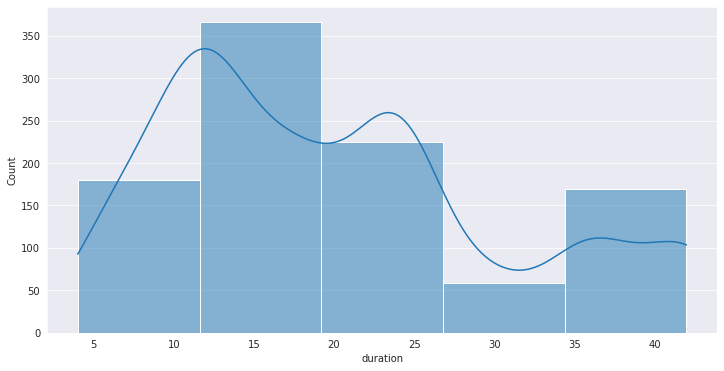

<Figure size 432x288 with 0 Axes>

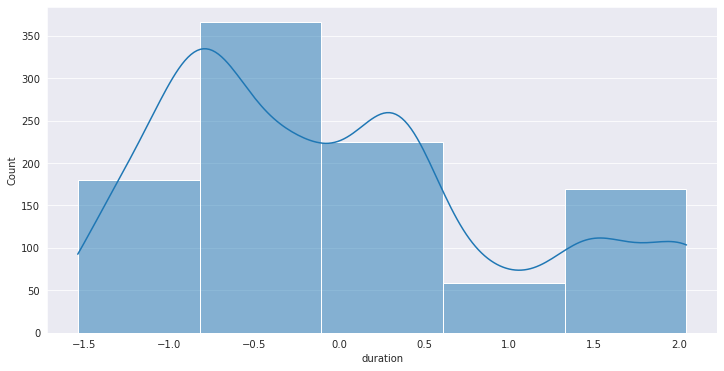

<Figure size 432x288 with 0 Axes>

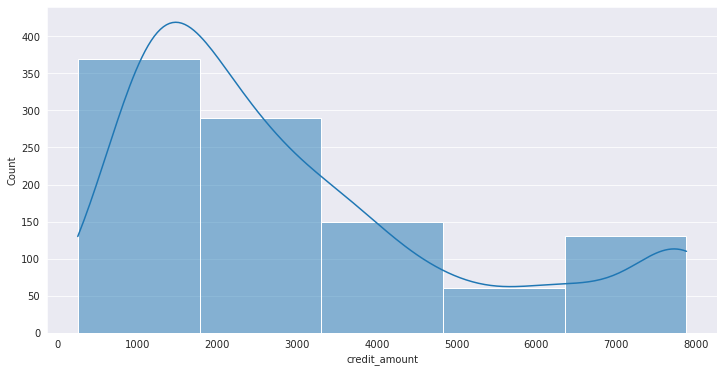

<Figure size 432x288 with 0 Axes>

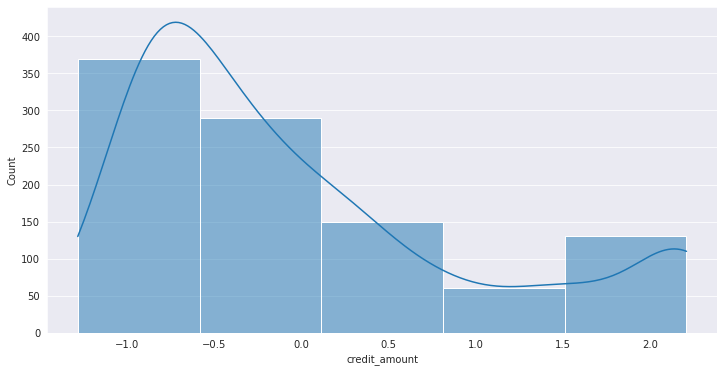

<Figure size 432x288 with 0 Axes>

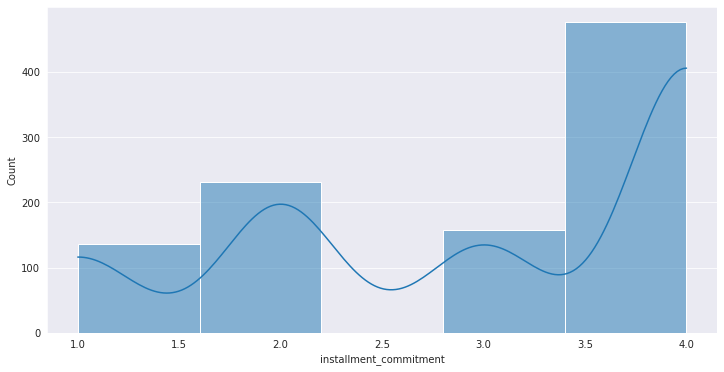

<Figure size 432x288 with 0 Axes>

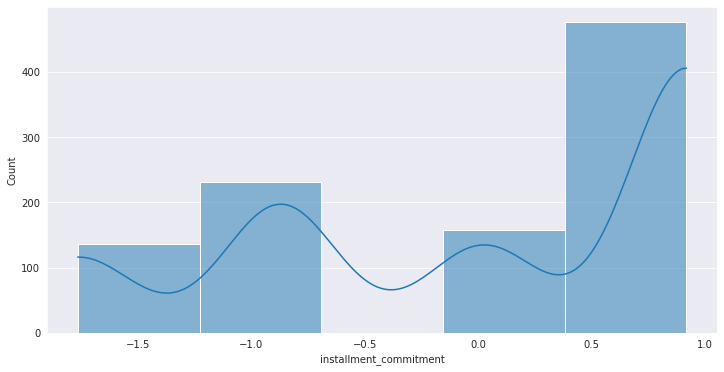

<Figure size 432x288 with 0 Axes>

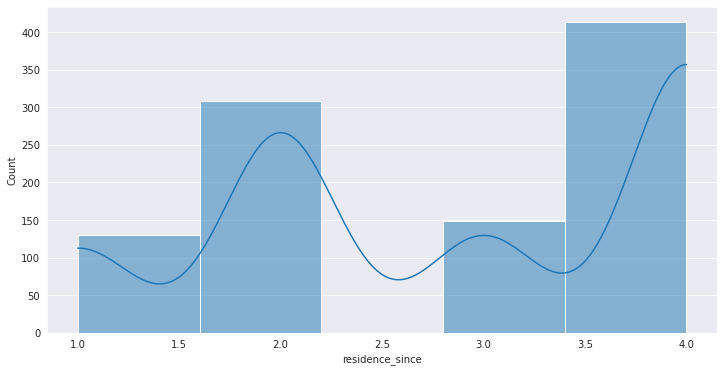

<Figure size 432x288 with 0 Axes>

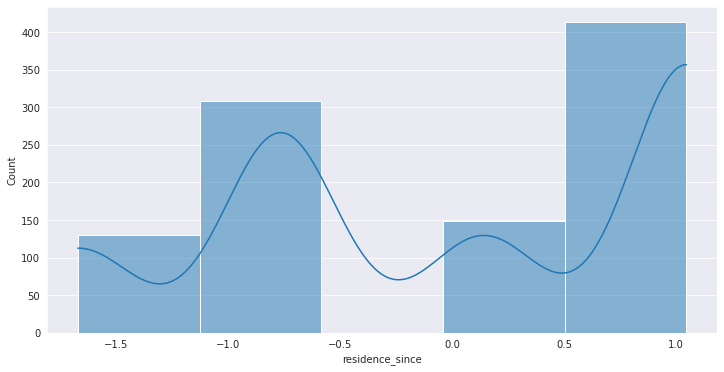

<Figure size 432x288 with 0 Axes>

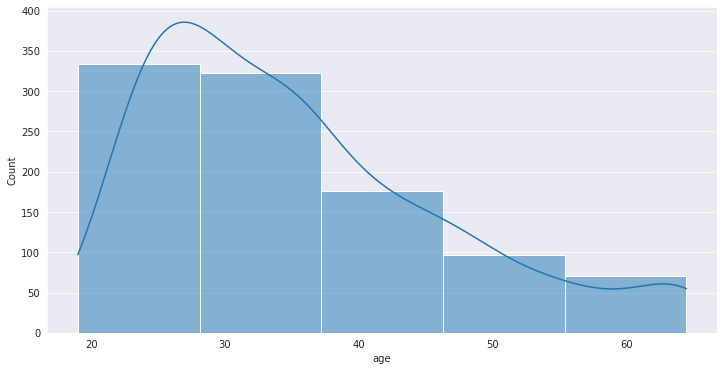

<Figure size 432x288 with 0 Axes>

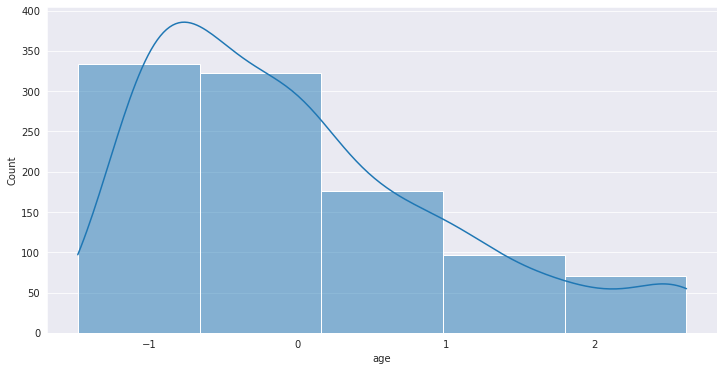

<Figure size 432x288 with 0 Axes>

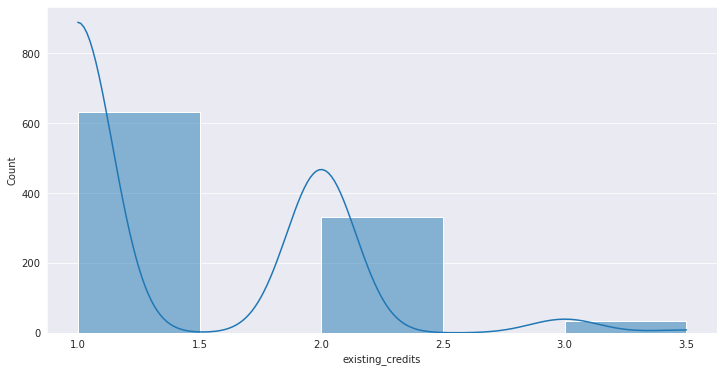

<Figure size 432x288 with 0 Axes>

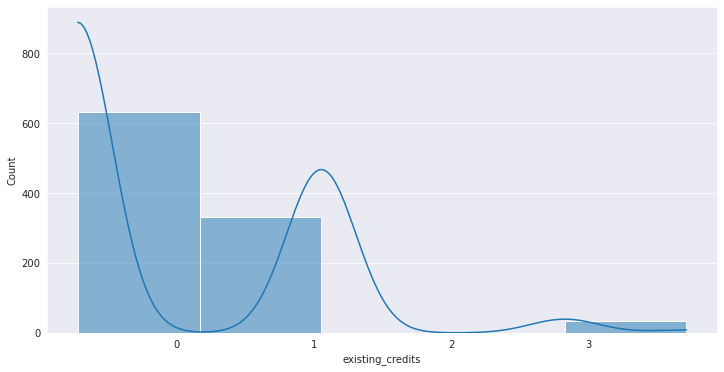

<Figure size 432x288 with 0 Axes>

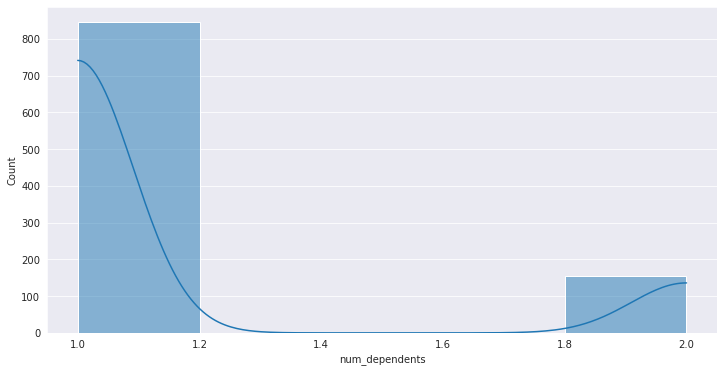

<Figure size 432x288 with 0 Axes>

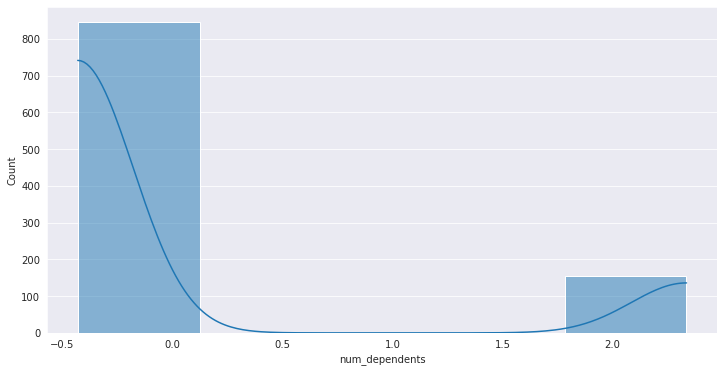

In [9]:
def histogram(x, bins):
  plt.figure()
  sns.set_style("darkgrid")
  f, ax = plt.subplots(figsize=(12, 6))
  sns.histplot(x, bins = bins, kde = True )
  plt.grid(axis = 'x')
  return;

for c in scaled_data: 
    histogram(iqr_data[c].dropna(), 5)
    histogram(scaled_data[c].dropna(), 5)


## Correletaion between variables

<AxesSubplot:>

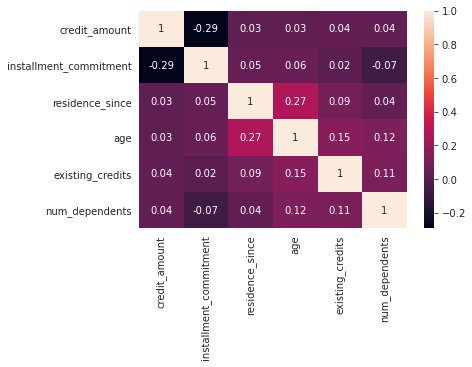

In [10]:
#korelačná matica
cor_matrix = round(scaled_data.iloc[:,1:].corr(),2)
sns.heatmap(cor_matrix, annot=True)

In [11]:
scaled_data.to_csv('./data/scaled_data.csv')

## Transformation of categorical features

### Find number of occurences for categories

In [12]:
import numpy as np
pd.set_option('display.max_rows', 500)
pivot_data = data_categorical.agg(['nunique']).T
pivot_data['over_8'] = np.where(pivot_data['nunique'] > 8, 1, 0).astype(int)

dict = {}
for x in data_categorical.columns:
    value_count = data_categorical[x].value_counts()
    value_count = value_count/data_categorical[x].count()
    dict[x] = value_count.where(lambda x : x < 0.05).count()
    
result = pd.merge(pivot_data, pd.Series(dict, name='under_5_perc'), left_index=True, right_index=True)
result['flag'] = np.where((result['over_8'] > 0) | (result['under_5_perc'] > 0), 1, 0)
display(result)

,nunique,over_8,under_5_perc,flag
checking_status,4,0,0,0
credit_history,5,0,2,1
purpose,10,1,4,1
savings_status,5,0,1,1
employment,5,0,0,0
personal_status,4,0,0,0
other_parties,3,0,1,1
property_magnitude,4,0,0,0
other_payment_plans,3,0,1,1
housing,3,0,0,0


In [13]:
df_size = data_categorical.shape[0]
min_percentage_to_merge = 0.05
replaced_cat_data = data_categorical.copy()

#iterate through all categorical features
for f in data_categorical:
    #group by category value and get count
    cat_distribution = pd.DataFrame(data_categorical[[f]].groupby(f).size() / df_size).reset_index().rename(columns={0: 'count'}).sort_values(by='count')
    #get those values with count <= that minimum value
    insufficient_count_data = cat_distribution[cat_distribution['count'] <= min_percentage_to_merge]
    #if there are more of those per category
    if insufficient_count_data.shape[0] > 1:
        display(insufficient_count_data)
        replaced_cat_data[f] = replaced_cat_data[f].replace(insufficient_count_data[f].tolist(), 'OTHER')
    
display(replaced_cat_data)

,credit_history,count
4,no credits/all paid,0.040
0,all paid,0.049


,purpose,count
8,retraining,0.009
1,domestic appliance,0.012
5,other,0.012
7,repairs,0.022
2,education,0.050


,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
id,,,,,,,,,,,,,
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes
2,no checking,critical/other existing credit,OTHER,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,existing paid,furniture/equipment,<100,4<=X<7,female div/dep/mar,none,real estate,none,own,unskilled resident,none,yes
996,<0,existing paid,used car,<100,1<=X<4,male div/sep,none,life insurance,none,own,high qualif/self emp/mgmt,yes,yes
997,no checking,existing paid,radio/tv,<100,>=7,male single,none,car,none,own,skilled,none,yes


### One hot encoder

In [14]:
oh_data = data_categorical.copy()
oh_data = pd.get_dummies(oh_data, columns=oh_data.columns.tolist(), prefix = oh_data.columns.tolist(),drop_first=True)

display(oh_data.head())

,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,1
1,0,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,1
3,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


## Combinign back numerical and categorical data 

In [15]:
full_data = pd.merge(oh_data, scaled_data, how='inner', left_index=True, right_index=True) 
full_data = pd.merge(full_data, data[['class']], how='inner', left_index=True, right_index=True).rename({'class': 'label'})

display(full_data)

,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,...,own_telephone_yes,foreign_worker_yes,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,1,1,-1.348465,-0.860961,0.918477,1.046987,2.616620,1.054770,-0.428290,True
1,0,0,0,0,0,1,0,0,0,0,...,0,1,2.044611,1.326550,-0.870183,-0.765977,-1.211943,-0.714978,-0.428290,False
2,0,0,1,1,0,0,0,0,1,0,...,0,1,-0.782952,-0.436908,-0.870183,0.140505,1.220321,-0.714978,2.334869,True
3,1,0,0,0,0,1,0,0,0,1,...,0,1,2.044611,2.209879,-0.870183,1.046987,0.859985,-0.714978,2.334869,True
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0.348073,0.832050,0.024147,1.046987,1.580656,1.054770,2.334869,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,0,0,0,1,...,0,1,-0.782952,-0.601589,0.024147,1.046987,-0.401188,-0.714978,-0.428290,True
996,1,0,0,0,0,1,0,0,0,0,...,1,1,0.913586,0.368656,0.918477,1.046987,0.409566,-0.714978,-0.428290,True
997,0,0,1,0,0,1,0,0,0,0,...,0,1,-0.782952,-1.027929,0.918477,1.046987,0.229399,-0.714978,-0.428290,True


In [16]:
#import sweetviz as sv
#report = sv.analyze(source=[full_data, "Datamart v2"], target_feat = 'class', pairwise_analysis = 'on')

In [17]:
display(full_data)

,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,...,own_telephone_yes,foreign_worker_yes,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,1,1,-1.348465,-0.860961,0.918477,1.046987,2.616620,1.054770,-0.428290,True
1,0,0,0,0,0,1,0,0,0,0,...,0,1,2.044611,1.326550,-0.870183,-0.765977,-1.211943,-0.714978,-0.428290,False
2,0,0,1,1,0,0,0,0,1,0,...,0,1,-0.782952,-0.436908,-0.870183,0.140505,1.220321,-0.714978,2.334869,True
3,1,0,0,0,0,1,0,0,0,1,...,0,1,2.044611,2.209879,-0.870183,1.046987,0.859985,-0.714978,2.334869,True
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0.348073,0.832050,0.024147,1.046987,1.580656,1.054770,2.334869,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,0,0,0,1,...,0,1,-0.782952,-0.601589,0.024147,1.046987,-0.401188,-0.714978,-0.428290,True
996,1,0,0,0,0,1,0,0,0,0,...,1,1,0.913586,0.368656,0.918477,1.046987,0.409566,-0.714978,-0.428290,True
997,0,0,1,0,0,1,0,0,0,0,...,0,1,-0.782952,-1.027929,0.918477,1.046987,0.229399,-0.714978,-0.428290,True


In [21]:
#report.show_html('report_new.html')

In [22]:
full_data.to_csv('./data/full_data.csv')

###  Correlation

In [23]:
corr_matrix = full_data.corr(method='kendall').abs()
display(corr_matrix)

,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,...,own_telephone_yes,foreign_worker_yes,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
checking_status_<0,1.000000,0.159297,0.495358,0.065430,0.095859,0.066396,0.023341,0.035253,0.007201,0.130479,...,0.067149,0.057751,0.033050,0.006114,0.045815,0.083009,0.029753,0.036363,0.059041,0.258333
checking_status_>=200,0.159297,1.000000,0.209080,0.004151,0.036961,0.029770,0.010922,0.009223,0.016052,0.004308,...,0.028955,0.036392,0.063123,0.075861,0.041479,0.057282,0.025742,0.046813,0.008700,0.044009
checking_status_no checking,0.495358,0.209080,1.000000,0.168879,0.024041,0.089471,0.091486,0.013683,0.002817,0.065454,...,0.061825,0.017108,0.043761,0.006962,0.022190,0.000264,0.078943,0.109069,0.010914,0.322436
credit_history_critical/other existing credit,0.065430,0.004151,0.168879,1.000000,0.199971,0.683617,0.131407,0.050769,0.043853,0.017308,...,0.043110,0.036770,0.056420,0.021984,0.039077,0.079854,0.151686,0.520687,0.021765,0.181713
credit_history_delayed previously,0.095859,0.036961,0.024041,0.199971,1.000000,0.329862,0.063407,0.034234,0.009718,0.054349,...,0.046384,0.060888,0.122919,0.097406,0.015175,0.021149,0.027011,0.165577,0.042526,0.012325
credit_history_existing paid,0.066396,0.029770,0.089471,0.683617,0.329862,1.000000,0.216762,0.066980,0.032176,0.052404,...,0.057655,0.004140,0.062642,0.069263,0.019793,0.073395,0.155738,0.576392,0.078339,0.043722
credit_history_no credits/all paid,0.023341,0.010922,0.091486,0.131407,0.063407,0.216762,1.000000,0.022496,0.046829,0.003181,...,0.001664,0.014058,0.084010,0.096874,0.053446,0.002432,0.009356,0.125303,0.011281,0.144767
purpose_domestic appliance,0.035253,0.009223,0.013683,0.050769,0.034234,0.066980,0.022496,1.000000,0.025283,0.051810,...,0.015871,0.021602,0.043429,0.078487,0.019338,0.018300,0.021640,0.063947,0.047201,0.008016
purpose_education,0.007201,0.016052,0.002817,0.043853,0.009718,0.032176,0.046829,0.025283,1.000000,0.107850,...,0.016831,0.044969,0.016029,0.032605,0.043354,0.038150,0.056305,0.011207,0.041204,0.070088
purpose_furniture/equipment,0.130479,0.004308,0.065454,0.017308,0.054349,0.052404,0.003181,0.051810,0.107850,1.000000,...,0.053587,0.009590,0.027174,0.045104,0.056569,0.005061,0.107898,0.075515,0.086515,0.020971


In [24]:
#Removing corelated atributes
# set diagonal values to 0
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix_triangle = pd.DataFrame(np.abs(np.where(mask, 0, corr_matrix)),columns=full_data.columns, index = full_data.columns)


display(corr_matrix_triangle)

,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,...,own_telephone_yes,foreign_worker_yes,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
checking_status_<0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
checking_status_>=200,0.159297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
checking_status_no checking,0.495358,0.209080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
credit_history_critical/other existing credit,0.065430,0.004151,0.168879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
credit_history_delayed previously,0.095859,0.036961,0.024041,0.199971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
credit_history_existing paid,0.066396,0.029770,0.089471,0.683617,0.329862,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
credit_history_no credits/all paid,0.023341,0.010922,0.091486,0.131407,0.063407,0.216762,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
purpose_domestic appliance,0.035253,0.009223,0.013683,0.050769,0.034234,0.066980,0.022496,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
purpose_education,0.007201,0.016052,0.002817,0.043853,0.009718,0.032176,0.046829,0.025283,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
purpose_furniture/equipment,0.130479,0.004308,0.065454,0.017308,0.054349,0.052404,0.003181,0.051810,0.107850,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [25]:
high_correlations=[]
threshold=0.5
rows, cols = np.tril_indices(corr_matrix.shape[0], k=-1)
for row, col in zip(rows, cols):
    if abs(corr_matrix.iloc[row, col]) > threshold:
        col1 = corr_matrix.columns[row]
        col2 = corr_matrix.columns[col]
        high_correlations.append((col1, col2, corr_matrix.iloc[row, col]))
        
high_correlations_df=pd.DataFrame(high_correlations,columns=["Var1","Var2","Correlation"])
display(high_correlations_df)

,Var1,Var2,Correlation
0,credit_history_existing paid,credit_history_critical/other existing credit,0.683617
1,savings_status_no known savings,savings_status_<100,0.583281
2,other_parties_none,other_parties_guarantor,0.731408
3,housing_rent,housing_own,0.735968
4,job_unskilled resident,job_skilled,0.652438
5,existing_credits,credit_history_critical/other existing credit,0.520687
6,existing_credits,credit_history_existing paid,0.576392


In [26]:
columns_to_drop=high_correlations_df.iloc[:,0].unique().tolist()
display(columns_to_drop)
data_to_observe=full_data.drop(columns_to_drop,axis=1)
corr_matrix=corr_matrix.drop(columns_to_drop,axis=0)
corr_matrix=corr_matrix.drop(columns_to_drop,axis=1)
display(data_to_observe)


['credit_history_existing paid',
 'savings_status_no known savings',
 'other_parties_none',
 'housing_rent',
 'job_unskilled resident',
 'existing_credits']

,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,...,job_unemp/unskilled non res,own_telephone_yes,foreign_worker_yes,duration,credit_amount,installment_commitment,residence_since,age,num_dependents,class
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,0,1,1,-1.348465,-0.860961,0.918477,1.046987,2.616620,-0.428290,True
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2.044611,1.326550,-0.870183,-0.765977,-1.211943,-0.428290,False
2,0,0,1,1,0,0,0,1,0,0,...,0,0,1,-0.782952,-0.436908,-0.870183,0.140505,1.220321,2.334869,True
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,2.044611,2.209879,-0.870183,1.046987,0.859985,2.334869,True
4,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0.348073,0.832050,0.024147,1.046987,1.580656,2.334869,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,0,0,1,0,...,0,0,1,-0.782952,-0.601589,0.024147,1.046987,-0.401188,-0.428290,True
996,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0.913586,0.368656,0.918477,1.046987,0.409566,-0.428290,True
997,0,0,1,0,0,0,0,0,0,0,...,0,0,1,-0.782952,-1.027929,0.918477,1.046987,0.229399,-0.428290,True


In [27]:
correlated_columns = list(corr_matrix.columns[corr_matrix.loc['class']>0.10])
correlated_columns

['checking_status_<0',
 'checking_status_no checking',
 'credit_history_critical/other existing credit',
 'credit_history_no credits/all paid',
 'purpose_radio/tv',
 'savings_status_<100',
 'employment_<1',
 'property_magnitude_no known property',
 'property_magnitude_real estate',
 'other_payment_plans_none',
 'housing_own',
 'duration',
 'class']

['checking_status_<0',
 'checking_status_no checking',
 'credit_history_critical/other existing credit',
 'credit_history_no credits/all paid',
 'purpose_radio/tv',
 'savings_status_<100',
 'employment_<1',
 'property_magnitude_no known property',
 'property_magnitude_real estate',
 'other_payment_plans_none',
 'housing_own',
 'duration',
 'class']

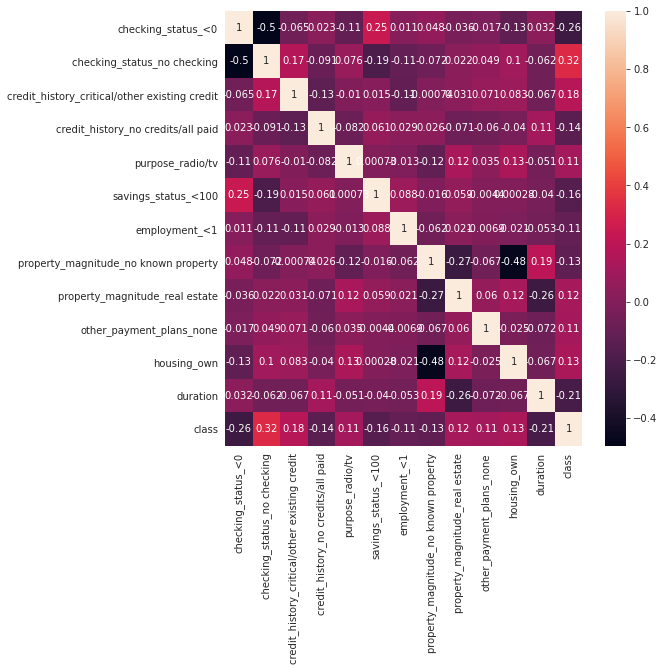

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
rel_cols=correlated_columns
display(rel_cols)
corr = full_data[rel_cols].corr()
plt.figure(figsize=(8,8))
hm = sns.heatmap(corr, annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

## Chi-Square Statistic

### Feature selection based on Chi-square


#### Selection of categorical features

In [29]:
chi_data = full_data.copy()
chi_data.rename(columns = {'class':'label_class'}, inplace = True)
print(chi_data['label_class'])
chi_data['label_class'] = chi_data['label_class'].map({True:1,False:0})
print(chi_data['label_class'])

id
0       True
1      False
2       True
3       True
4      False
       ...  
995     True
996     True
997     True
998    False
999     True
Name: label_class, Length: 1000, dtype: bool
id
0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: label_class, Length: 1000, dtype: int64


In [30]:
unique_count_ratio = 0.05
empty_ratio = 0.9
min_distinct_values = 2
excluded_features = ['label_class']
cat_features = []
columns = chi_data.columns 
#consider feature categorical if ratio is below given value and number of unique records is >= 2
for var in columns:
    if \
      1.*chi_data[var].nunique()/chi_data[var].count() < unique_count_ratio \
      and chi_data[var].nunique() >= min_distinct_values \
      and chi_data[var].isna().sum() / chi_data[var].count() < empty_ratio:
        cat_features.append(var)
cat_features = [f for f in cat_features if f not in excluded_features ]
display(cat_features)

['checking_status_<0',
 'checking_status_>=200',
 'checking_status_no checking',
 'credit_history_critical/other existing credit',
 'credit_history_delayed previously',
 'credit_history_existing paid',
 'credit_history_no credits/all paid',
 'purpose_domestic appliance',
 'purpose_education',
 'purpose_furniture/equipment',
 'purpose_new car',
 'purpose_other',
 'purpose_radio/tv',
 'purpose_repairs',
 'purpose_retraining',
 'purpose_used car',
 'savings_status_500<=X<1000',
 'savings_status_<100',
 'savings_status_>=1000',
 'savings_status_no known savings',
 'employment_4<=X<7',
 'employment_<1',
 'employment_>=7',
 'employment_unemployed',
 'personal_status_male div/sep',
 'personal_status_male mar/wid',
 'personal_status_male single',
 'other_parties_guarantor',
 'other_parties_none',
 'property_magnitude_life insurance',
 'property_magnitude_no known property',
 'property_magnitude_real estate',
 'other_payment_plans_none',
 'other_payment_plans_stores',
 'housing_own',
 'housing_

In [31]:
# convert `data[cat_features]` to a pandas DataFrame
cat_features_df = chi_data[cat_features]

# select the columns that contain only non-negative values
cat_features_no_neg = cat_features_df.loc[:, (cat_features_df >= 0).all()]

# convert back to list
cat_features_no_neg_list = cat_features_no_neg.columns.tolist()

#### Chi-square computation

In [32]:
from sklearn.feature_selection import chi2
#cat_features_only = data.drop(['label', 'index_class'] axis=1)
chi = chi2(chi_data[cat_features_no_neg_list], chi_data.label_class)
chi_table = pd.DataFrame()
chi_table['chi_sq_value'] = chi[0]
chi_table['p_value'] = chi[1]
chi_table['feature'] = cat_features_no_neg_list

#pd.set_option('display.max_rows', 50)
display(chi_table.set_index('feature').sort_values('p_value', ascending=True))

,chi_sq_value,p_value
feature,,
checking_status_no checking,63.002659,2.064277e-15
checking_status_<0,48.450469,3.387373e-12
credit_history_critical/other existing credit,23.344872,1.354040e-06
credit_history_no credits/all paid,20.119048,7.276835e-06
savings_status_no known savings,13.645850,2.207287e-04
property_magnitude_no known property,13.377860,2.546120e-04
savings_status_<100,10.291479,1.336459e-03
property_magnitude_real estate,10.218845,1.390129e-03
employment_<1,9.373200,2.201808e-03


In [33]:
chi_table[chi_table['chi_sq_value']>10]

,chi_sq_value,p_value,feature
0,48.450469,3.387373e-12,checking_status_<0
2,63.002659,2.064277e-15,checking_status_no checking
3,23.344872,1.354040e-06,credit_history_critical/other existing credit
6,20.119048,7.276835e-06,credit_history_no credits/all paid
17,10.291479,1.336459e-03,savings_status_<100
19,13.645850,2.207287e-04,savings_status_no known savings
30,13.377860,2.546120e-04,property_magnitude_no known property
31,10.218845,1.390129e-03,property_magnitude_real estate


In [34]:
significant_columns = chi_table[chi_table['p_value']<0.05].sort_values('p_value', ascending=True)
significant_columns

,chi_sq_value,p_value,feature
2,63.002659,2.064277e-15,checking_status_no checking
0,48.450469,3.387373e-12,checking_status_<0
3,23.344872,1.354040e-06,credit_history_critical/other existing credit
6,20.119048,7.276835e-06,credit_history_no credits/all paid
19,13.645850,2.207287e-04,savings_status_no known savings
30,13.377860,2.546120e-04,property_magnitude_no known property
17,10.291479,1.336459e-03,savings_status_<100
31,10.218845,1.390129e-03,property_magnitude_real estate
21,9.373200,2.201808e-03,employment_<1
15,8.932501,2.801405e-03,purpose_used car


In [35]:
columns_to_keep = list(significant_columns['feature'])
columns_to_keep = np.append(columns_to_keep,['label_class'])
chi_data=chi_data[columns_to_keep]
chi_data

,checking_status_no checking,checking_status_<0,credit_history_critical/other existing credit,credit_history_no credits/all paid,savings_status_no known savings,property_magnitude_no known property,savings_status_<100,property_magnitude_real estate,employment_<1,purpose_used car,purpose_radio/tv,purpose_new car,housing_rent,savings_status_>=1000,housing_own,employment_4<=X<7,savings_status_500<=X<1000,purpose_education,label_class
id,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1
996,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
997,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [36]:
from sklearn.model_selection import train_test_split

X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(chi_data, chi_data.label_class, test_size=0.20, random_state=42)
X_train_chi=X_train_chi.drop('label_class',axis=1)
X_test_chi=X_test_chi.drop('label_class',axis=1)
print('Frequencies of target variable in training data set:',y_train_chi.value_counts())
print('Frequencies of target variable in testing data set:',y_test_chi.value_counts())


Frequencies of target variable in training data set: 1    559
0    241
Name: label_class, dtype: int64
Frequencies of target variable in testing data set: 1    141
0     59
Name: label_class, dtype: int64


## Decision Tree

In [38]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer,classification_report

#create the model
tree_model = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the model
tree_model.fit(X_train_chi, y_train_chi)

y_pred_chi=tree_model.predict(X_test_chi)

print(classification_report(y_pred_chi, y_test_chi))
print('\nAccuracy Score for Decision Tree model: ', accuracy_score(y_pred_chi,y_test_chi))

              precision    recall  f1-score   support

           0       0.44      0.45      0.44        58
           1       0.77      0.77      0.77       142

    accuracy                           0.68       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.68      0.68      0.68       200


Accuracy Score for Decision Tree model:  0.675


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier 

for x in range(2,10):
    for y in [100,50,10]:
        forest=RandomForestClassifier(max_depth=x,n_estimators=y)
        forest.fit(X_train_chi,y_train_chi)
        y_pred_chi=forest.predict(X_test_chi)
        print("depth= ",x,' estimators= ',y,' accuracy= ',accuracy_score(y_test_chi,y_pred_chi))

depth=  2  estimators=  100  accuracy=  0.71
depth=  2  estimators=  50  accuracy=  0.71
depth=  2  estimators=  10  accuracy=  0.705
depth=  3  estimators=  100  accuracy=  0.72
depth=  3  estimators=  50  accuracy=  0.71
depth=  3  estimators=  10  accuracy=  0.715
depth=  4  estimators=  100  accuracy=  0.74
depth=  4  estimators=  50  accuracy=  0.75
depth=  4  estimators=  10  accuracy=  0.74
depth=  5  estimators=  100  accuracy=  0.755
depth=  5  estimators=  50  accuracy=  0.75
depth=  5  estimators=  10  accuracy=  0.755
depth=  6  estimators=  100  accuracy=  0.74
depth=  6  estimators=  50  accuracy=  0.74
depth=  6  estimators=  10  accuracy=  0.74
depth=  7  estimators=  100  accuracy=  0.74
depth=  7  estimators=  50  accuracy=  0.725
depth=  7  estimators=  10  accuracy=  0.74
depth=  8  estimators=  100  accuracy=  0.725
depth=  8  estimators=  50  accuracy=  0.73
depth=  8  estimators=  10  accuracy=  0.695
depth=  9  estimators=  100  accuracy=  0.73
depth=  9  estima

In [40]:
forest_model=RandomForestClassifier(max_depth=6, n_estimators=50)
forest_model.fit(X_train_chi,y_train_chi)

y_pred_chi=forest_model.predict(X_test_chi)
print(classification_report(y_pred_chi, y_test_chi))
print('\nAccuracy Score for Random Forest model: ', accuracy_score(y_pred_chi,y_test_chi))

              precision    recall  f1-score   support

           0       0.29      0.65      0.40        26
           1       0.94      0.76      0.84       174

    accuracy                           0.74       200
   macro avg       0.61      0.71      0.62       200
weighted avg       0.85      0.74      0.78       200


Accuracy Score for Random Forest model:  0.745


## Ada Boost Model

In [41]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier

ada_model = AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best'),
          learning_rate=0.75, n_estimators=300, random_state=None)
ada_model.fit(X_train_chi,y_train_chi)
y_pred_chi=ada_model.predict(X_test_chi)
print(classification_report(y_pred_chi, y_test_chi))
print('\nAccuracy Score for Ada Boost model: ', accuracy_score(y_pred_chi,y_test_chi))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59        79
           1       0.73      0.85      0.79       121

    accuracy                           0.72       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.72      0.72      0.71       200


Accuracy Score for Ada Boost model:  0.72


## Feature selection using f_regression()

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = full_data.iloc[:,:-1].values ### Important: we have to use all the original features, not only the highly correlated ones (-> full_data)
y = full_data.iloc[:, -1].values

fs = SelectKBest(score_func=f_regression, k=20)

X_subset = fs.fit_transform(X, y)
display(X_subset.shape)
mask=fs.get_support()
mask = np.append(mask, False)

selected_features = full_data.columns[mask] ## again, using the full_data here
display(selected_features)

(1000, 20)

Index(['checking_status_<0', 'checking_status_no checking',
       'credit_history_critical/other existing credit',
       'credit_history_no credits/all paid', 'purpose_new car',
       'purpose_radio/tv', 'purpose_used car', 'savings_status_<100',
       'savings_status_>=1000', 'savings_status_no known savings',
       'employment_<1', 'property_magnitude_no known property',
       'property_magnitude_real estate', 'other_payment_plans_none',
       'housing_own', 'housing_rent', 'foreign_worker_yes', 'duration',
       'credit_amount', 'age'],
      dtype='object')

## Logistic regresion

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

lr = LogisticRegression()

lr.fit(X_train_chi, y_train_chi)
y_pred_chi = lr.predict(X_test_chi)
y_proba_chi = lr.predict_proba(X_test_chi)

print(classification_report(y_pred_chi, y_test_chi))
print('\nAccuracy Score for Logistic regression model: ', accuracy_score(y_pred_chi,y_test_chi))

              precision    recall  f1-score   support

           0       0.42      0.66      0.52        38
           1       0.91      0.79      0.84       162

    accuracy                           0.77       200
   macro avg       0.67      0.72      0.68       200
weighted avg       0.82      0.77      0.78       200


Accuracy Score for Logistic regression model:  0.765


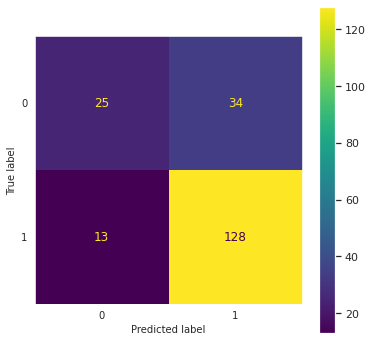

In [47]:
confusion_matrix = metrics.confusion_matrix(y_test_chi,y_pred_chi)

fig, _ = plt.subplots(nrows=1, figsize=(6,6))
ax = plt.subplot(1, 1, 1)
ax.grid(False)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
sns.set (rc = {'figure.figsize':(10, 10)})
_ = cm_display.plot(ax=ax)

## Model comparition

In [49]:
log_acc = lr.score(X_test_chi, y_test_chi)
tree_acc = tree_model.score(X_test_chi, y_test_chi)
forest_acc = forest_model.score(X_test_chi, y_test_chi)
ada_acc = ada_model.score(X_test_chi, y_test_chi)

print("Accuracy Results\n" + "*"*40)
print("      Logistic Model:", log_acc)
print("       Decision Tree:", tree_acc)
print("        Forest Model:", forest_acc)
print("           Ada Boost:", ada_acc)

Accuracy Results
****************************************
      Logistic Model: 0.765
       Decision Tree: 0.675
        Forest Model: 0.745
           Ada Boost: 0.72
